# Lab 3: Supervised Learning: Regression

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import category_encoders as ce

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exercise 1 — Dataset Understanding & Preprocessing

### 1. Load the dataset and display .head(), .info(), and .describe().

In [36]:
df = pd.read_csv('datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 2. Identify categorical and numerical features.

In [6]:
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

### 3.	Handle missing values if any.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

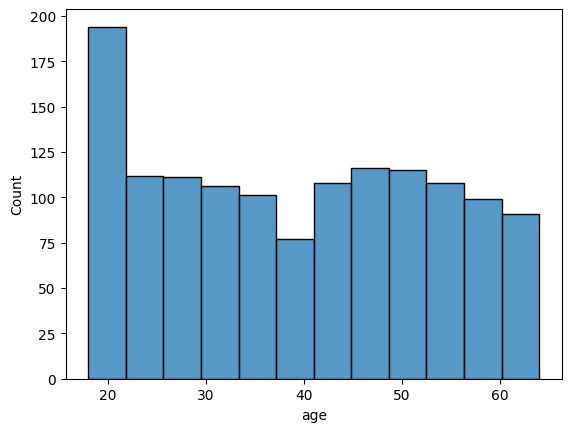

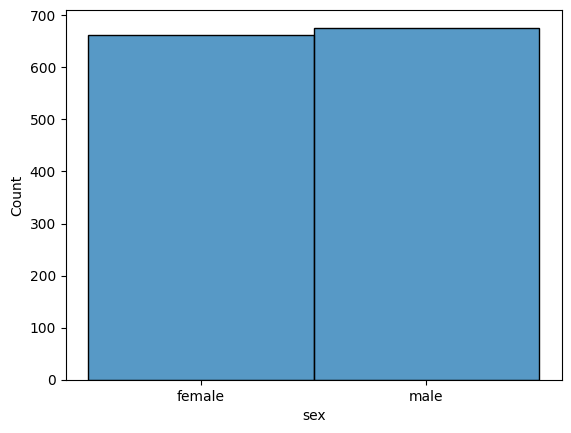

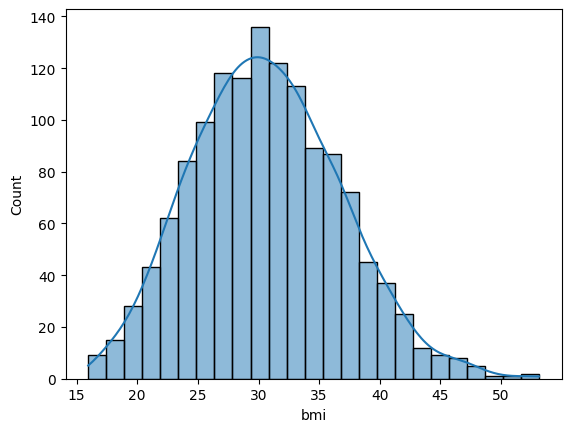

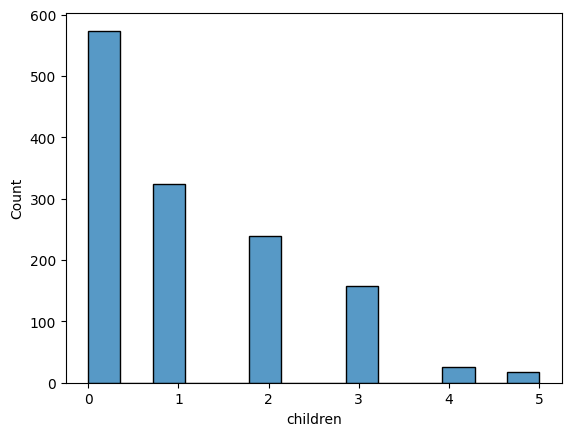

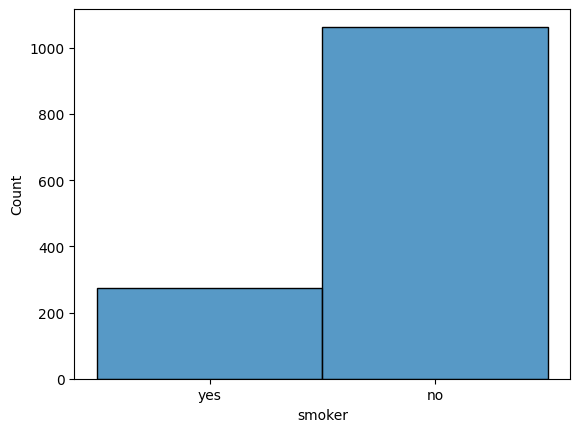

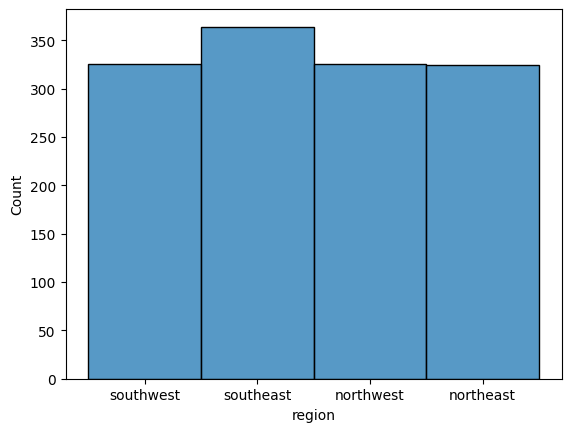

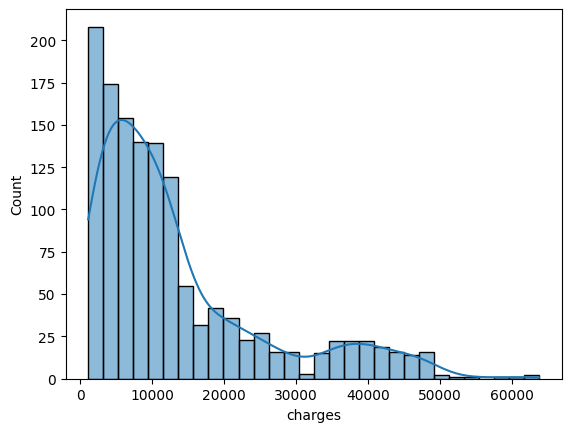

In [8]:
for col in df.columns:
    kde = False
    if col in ['bmi', 'charges']:
        kde = True
    sns.histplot(df[col], kde=kde)
    plt.show()

There is no missing values but is there were missing values in each col then i will apply the below stragies  
- age: replace with mode because there are a lot of people with 18 age but we can also use mean or median which is almost same  
- sex: replace with forword fill since both genders are equally distributed or we can use random forest or k-means to predict the gender and fill the missing values if it is all random  
- bmi: replace with mean since it is normally distributed  
- children: replace with mode since it look like most of the people have zero children or we can calculate the probabilities of having 0 to 5 childrens and randomaly fill the null values with those probabilites  
- smoker: replace with mode since there are a lot more non smokers  
- region: same as sex  
- charges: drop the rows since that's our target or use domain-knowlage to fill the values and if that's not an option then i guess we can use ranodm forest or k means to fill the missing values

### 4.	Encode categorical features using Label Encoding and One-Hot Encoding.

In [9]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

df = pd.get_dummies(df, columns=['region'])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [11]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('int64')

In [12]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


### 5.	Normalize/standardize numerical features.

In [13]:
df[numerical_cols].describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [14]:
scaler = StandardScaler()

In [15]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


#### 6.	Split the dataset into training and testing sets (80:20).

In [16]:
X = df.drop('charges', axis=1)
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"train shape: {X_train.shape}\ntest shape: {X_test.shape}")
total = X.shape[0]
print(f"train percentage: {(X_train.shape[0]/total)}\ntest percentage: {(X_test.shape[0]/total)}")

train shape: (1070, 9)
test shape: (268, 9)
train percentage: 0.7997010463378177
test percentage: 0.20029895366218237


---

## Exercise 2 — Apply Regression Models

**Predict target:** `charges`

**Models to implement:**

- Simple Linear Regression (use `bmi` only)
- Multiple Linear Regression (use all features)
- Polynomial Regression (degree 2 and 3; single-feature and multi-feature variants)
- Ridge Regression (tune `alpha`)
- Lasso Regression (tune `alpha`)
- Decision Tree Regressor

### Function to caluculate and log the model reasults matrics and plots and predicted values

In [18]:
model_results = {}

def log_model_results(model_name, model, y_true, y_pred, dataset_type="Test"):
    if model_name not in model_results:
        model_results[model_name] = {}

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    model_results[model_name][dataset_type] = {
        "model": model,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2,
        "y_true": y_true,
        "y_pred": y_pred
    }

    print(f"logging of {model_name} of type {dataset_type} completed")

### Simple Linear Regression (use `bmi` only)

In [19]:
X_train_bmi = X_train[['bmi']]
X_test_bmi = X_test[['bmi']]

lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train_bmi, y_train)

y_train_pred_simple = lin_reg_simple.predict(X_train_bmi)
log_model_results("Simple Linear Regression", lin_reg_simple, y_train, y_train_pred_simple, dataset_type="Train")

y_test_pred_simple = lin_reg_simple.predict(X_test_bmi)
log_model_results("Simple Linear Regression", lin_reg_simple, y_test, y_test_pred_simple, dataset_type="Test")

logging of Simple Linear Regression of type Train completed
logging of Simple Linear Regression of type Test completed


### Multiple Linear Regression (use all features)

In [20]:
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

y_train_pred_multi = lin_reg_multi.predict(X_train)
log_model_results("Multiple Linear Regression", lin_reg_multi, y_train, y_train_pred_multi, dataset_type="Train")

y_test_pred_multi = lin_reg_multi.predict(X_test)
log_model_results("Multiple Linear Regression", lin_reg_multi, y_test, y_test_pred_multi, dataset_type="Test")

logging of Multiple Linear Regression of type Train completed
logging of Multiple Linear Regression of type Test completed


### Polynomial Regression (degree 2 and 3, using both single and multiple features)

In [21]:
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_test_poly = poly.transform(X_test_bmi)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_train_pred_poly = poly_reg.predict(X_train_poly)
    log_model_results(f"Polynomial Regression (single feature) Degree:{degree}", poly_reg, y_train, y_train_pred_poly, dataset_type="Train")
    
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    log_model_results(f"Polynomial Regression (single feature) Degree:{degree}", poly_reg, y_test, y_test_pred_poly, dataset_type="Test")

logging of Polynomial Regression (single feature) Degree:2 of type Train completed
logging of Polynomial Regression (single feature) Degree:2 of type Test completed
logging of Polynomial Regression (single feature) Degree:3 of type Train completed
logging of Polynomial Regression (single feature) Degree:3 of type Test completed


In [22]:
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_train_pred_poly = poly_reg.predict(X_train_poly)
    log_model_results(f"Polynomial Regression (multi-feature) Degree:{degree}", poly_reg, y_train, y_train_pred_poly, dataset_type="Train")
    
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    log_model_results(f"Polynomial Regression (multi-feature) Degree:{degree}", poly_reg, y_test, y_test_pred_poly, dataset_type="Test")

logging of Polynomial Regression (multi-feature) Degree:2 of type Train completed
logging of Polynomial Regression (multi-feature) Degree:2 of type Test completed
logging of Polynomial Regression (multi-feature) Degree:3 of type Train completed
logging of Polynomial Regression (multi-feature) Degree:3 of type Test completed


### Ridge Regression (tune `alpha`)

In [23]:
for alpha in [0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_train_pred_ridge = ridge.predict(X_train)
    log_model_results(f"Ridge Regression alpha:{alpha}", ridge, y_train, y_train_pred_ridge, dataset_type="Train")
    
    y_test_pred_ridge = ridge.predict(X_test)
    log_model_results(f"Ridge Regression alpha:{alpha}", ridge, y_test, y_test_pred_ridge, dataset_type="Test")

logging of Ridge Regression alpha:0.1 of type Train completed
logging of Ridge Regression alpha:0.1 of type Test completed
logging of Ridge Regression alpha:1 of type Train completed
logging of Ridge Regression alpha:1 of type Test completed
logging of Ridge Regression alpha:10 of type Train completed
logging of Ridge Regression alpha:10 of type Test completed
logging of Ridge Regression alpha:100 of type Train completed
logging of Ridge Regression alpha:100 of type Test completed


### Lasso Regression (tune `alpha`)

In [24]:
for alpha in [0.001, 0.01, 0.1, 1]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    y_train_pred_lasso = lasso.predict(X_train)
    log_model_results(f"Lasso Regression alpha:{alpha}", lasso, y_train, y_train_pred_lasso, dataset_type="Train")
    
    y_test_pred_lasso = lasso.predict(X_test)
    log_model_results(f"Lasso Regression alpha:{alpha}", lasso, y_test, y_test_pred_lasso, dataset_type="Test")

logging of Lasso Regression alpha:0.001 of type Train completed
logging of Lasso Regression alpha:0.001 of type Test completed
logging of Lasso Regression alpha:0.01 of type Train completed
logging of Lasso Regression alpha:0.01 of type Test completed
logging of Lasso Regression alpha:0.1 of type Train completed
logging of Lasso Regression alpha:0.1 of type Test completed
logging of Lasso Regression alpha:1 of type Train completed
logging of Lasso Regression alpha:1 of type Test completed


### Decision Tree Regressor

In [25]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

y_train_pred_tree = tree_reg.predict(X_train)
log_model_results("Decision Tree Regressor", tree_reg, y_train, y_train_pred_tree, dataset_type="Train")

y_test_pred_tree = tree_reg.predict(X_test)
log_model_results("Decision Tree Regressor", tree_reg, y_test, y_test_pred_tree, dataset_type="Test")

logging of Decision Tree Regressor of type Train completed
logging of Decision Tree Regressor of type Test completed


## Exercise 3 — Model Comparison: Bias & Variance Analysis

### Step 1 — Create evaluation tables (fill after running models)

In [26]:
train_rows = []
test_rows = []

for model_name, datasets in model_results.items():
    train_metrics = datasets["Train"]
    train_rows.append({
        "Model": model_name,
        "MAE": train_metrics["MAE"],
        "MSE": train_metrics["MSE"],
        "RMSE": train_metrics["RMSE"],
        "R^2": train_metrics["R^2"]
    })
    
    test_metrics = datasets["Test"]
    test_rows.append({
        "Model": model_name,
        "MAE": test_metrics["MAE"],
        "MSE": test_metrics["MSE"],
        "RMSE": test_metrics["RMSE"],
        "R^2": test_metrics["R^2"]
    })

train_results = pd.DataFrame(train_rows)
test_results = pd.DataFrame(test_rows)

In [27]:
train_results

,Model,MAE,MSE,RMSE,R^2
0,Simple Linear Regression,9297.731258,1.437244e+08,11988.510085,0.046089
1,Multiple Linear Regression,4272.844255,3.785253e+07,6152.440835,0.748770
2,Polynomial Regression (single feature) Degree:2,9306.572513,1.436883e+08,11987.004150,0.046329
3,Polynomial Regression (single feature) Degree:3,9313.833235,1.435176e+08,11979.881486,0.047462
4,Polynomial Regression (multi-feature) Degree:2,2926.965409,2.309051e+07,4805.258368,0.846746
5,Polynomial Regression (multi-feature) Degree:3,2791.982635,2.136648e+07,4622.389510,0.858189
6,Ridge Regression alpha:0.1,4273.816160,3.785256e+07,6152.443400,0.748769
7,Ridge Regression alpha:1,4282.683467,3.785565e+07,6152.694758,0.748749
8,Ridge Regression alpha:10,4376.227563,3.813501e+07,6175.355125,0.746895
9,Ridge Regression alpha:100,5235.599194,5.058532e+07,7112.335704,0.664261


In [28]:
test_results

,Model,MAE,MSE,RMSE,R^2
0,Simple Linear Regression,9109.830073,1.294256e+08,11376.539174,-0.001790
1,Multiple Linear Regression,4013.533238,3.137081e+07,5600.965178,0.757181
2,Polynomial Regression (single feature) Degree:2,9109.360661,1.291161e+08,11362.927927,0.000606
3,Polynomial Regression (single feature) Degree:3,9110.202911,1.288902e+08,11352.981480,0.002355
4,Polynomial Regression (multi-feature) Degree:2,2811.746436,2.000654e+07,4472.866622,0.845144
5,Polynomial Regression (multi-feature) Degree:3,2825.068496,2.131495e+07,4616.811315,0.835016
6,Ridge Regression alpha:0.1,4014.431734,3.136551e+07,5600.492386,0.757222
7,Ridge Regression alpha:1,4022.705726,3.132083e+07,5596.501428,0.757568
8,Ridge Regression alpha:10,4103.648051,3.113871e+07,5580.206583,0.758978
9,Ridge Regression alpha:100,4834.132694,4.024920e+07,6344.226002,0.688460


### Step 2 — Visualize Results

In [29]:
# 1. Comparative Bar Charts
metrics = ['RMSE', 'R^2']
dataset_types = ['Train', 'Test']

# Collect metrics into a dictionary for plotting
metric_data = {m: {d: [] for d in dataset_types} for m in metrics}
model_names = list(model_results.keys())

for model_name in model_names:
    for d in dataset_types:
        metric_data['RMSE'][d].append(model_results[model_name][d]['RMSE'])
        metric_data['R^2'][d].append(model_results[model_name][d]['R^2'])

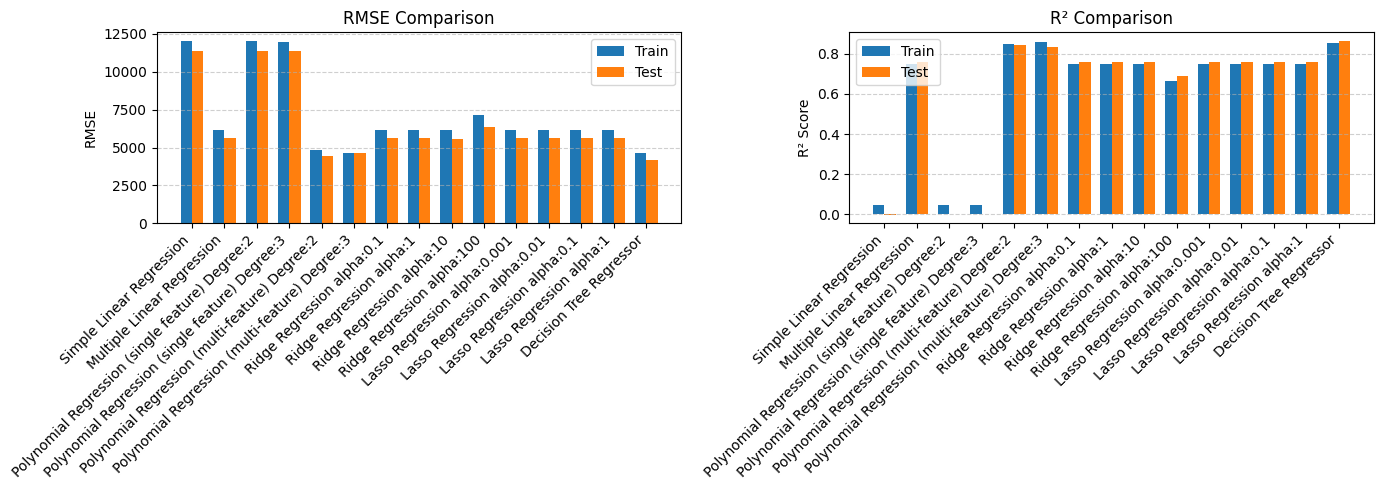

In [30]:
# Plot RMSE and R2 bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(model_names))
width = 0.35

# RMSE Bar Chart
axes[0].bar(x - width/2, metric_data['RMSE']['Train'], width, label='Train')
axes[0].bar(x + width/2, metric_data['RMSE']['Test'], width, label='Test')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].set_ylabel('RMSE')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# R2 Bar Chart
axes[1].bar(x - width/2, metric_data['R^2']['Train'], width, label='Train')
axes[1].bar(x + width/2, metric_data['R^2']['Test'], width, label='Test')
axes[1].set_title('R² Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].set_ylabel('R² Score')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

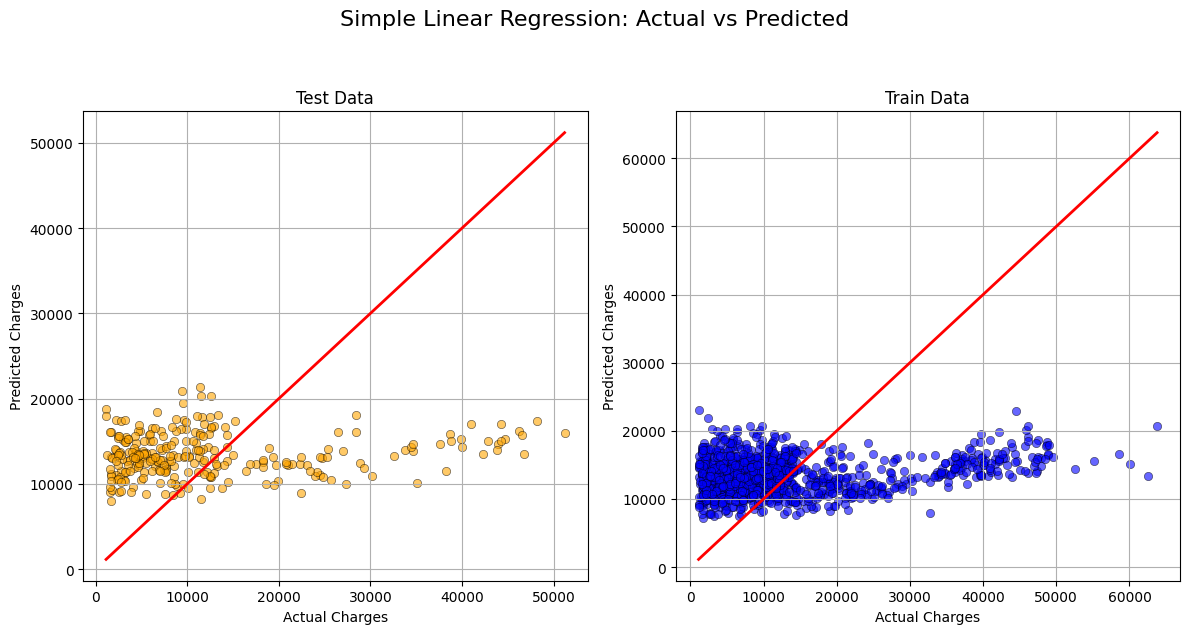

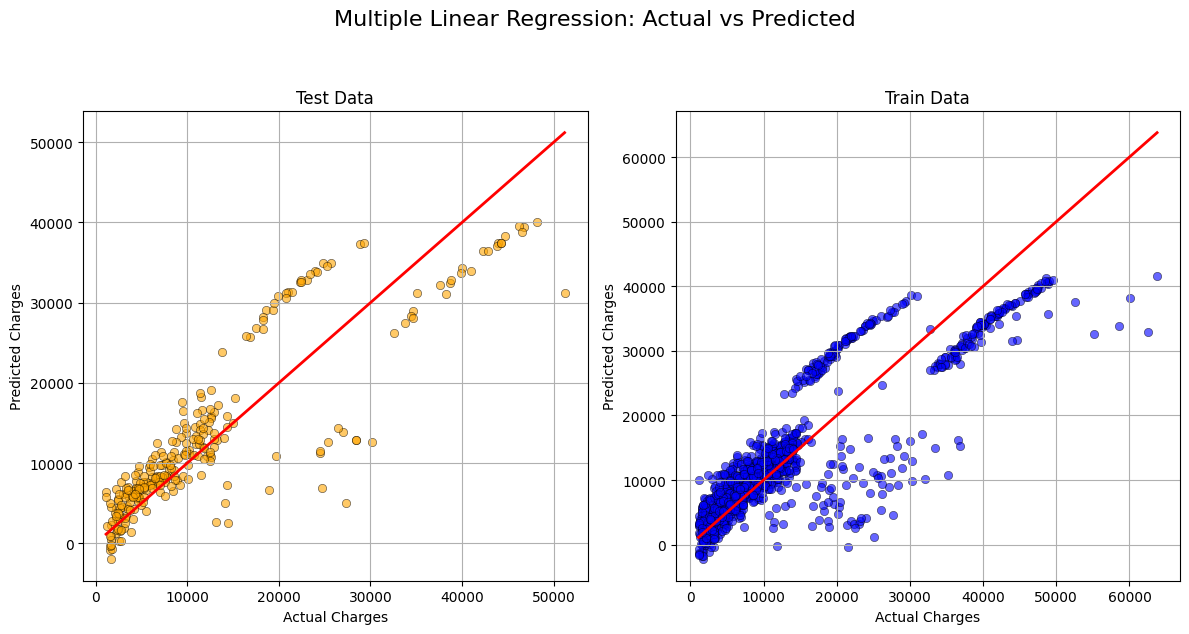

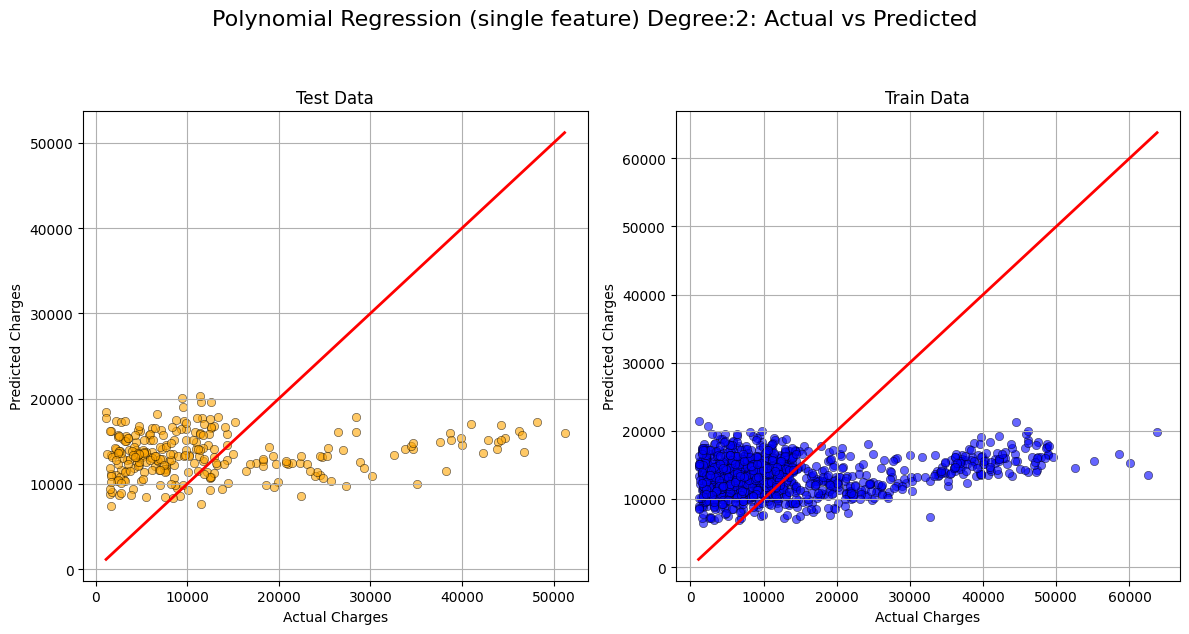

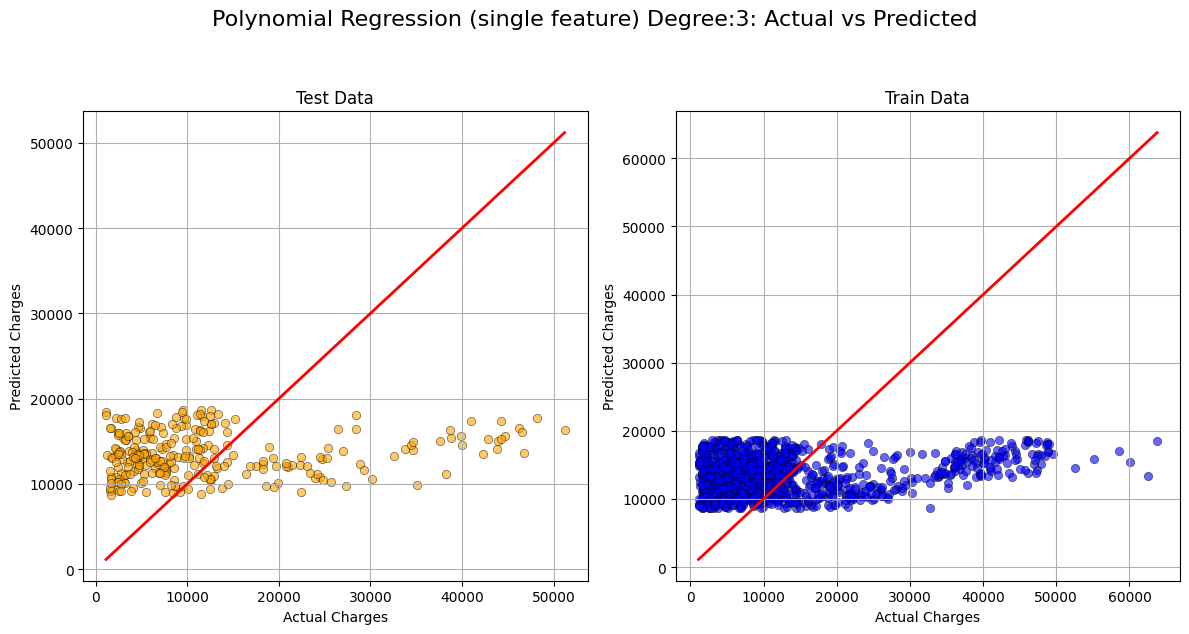

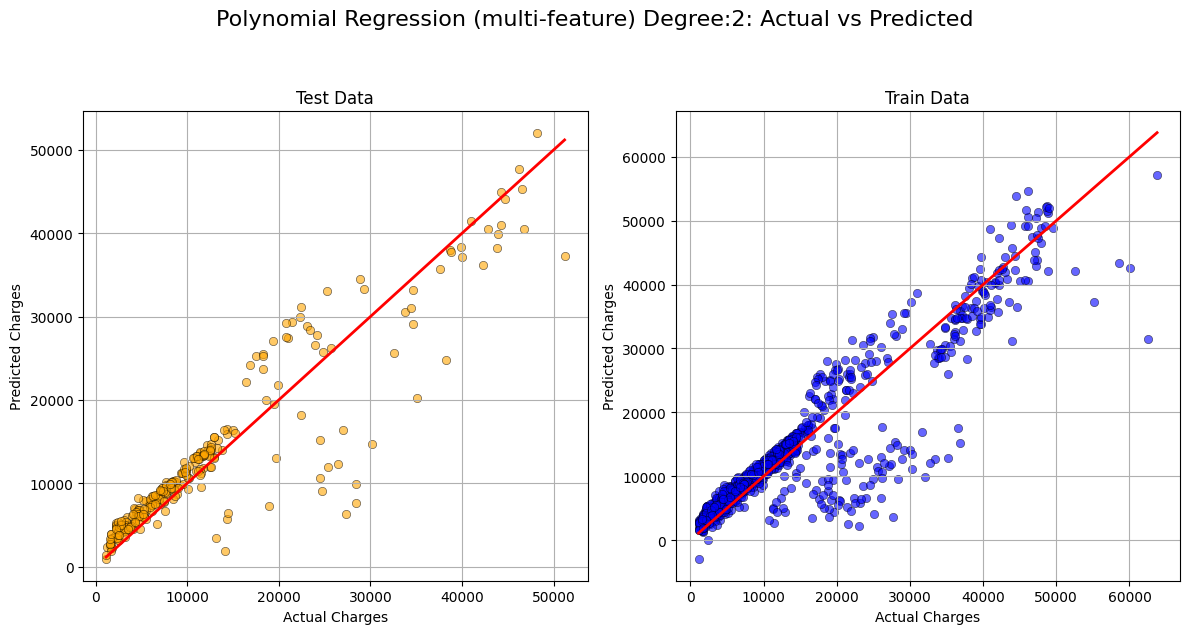

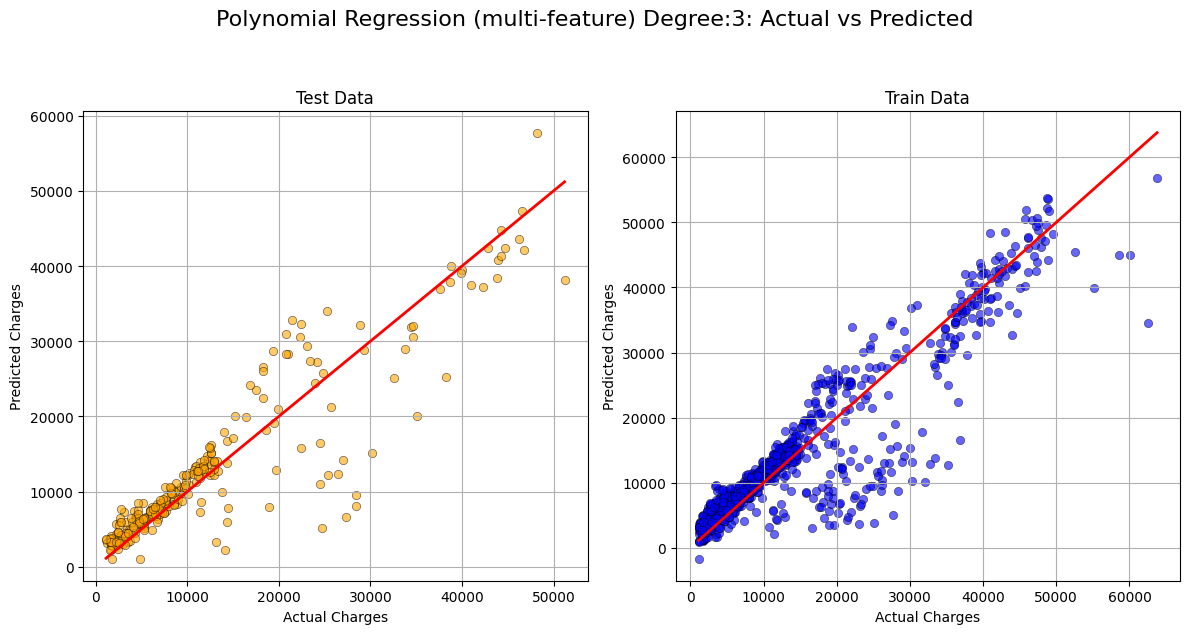

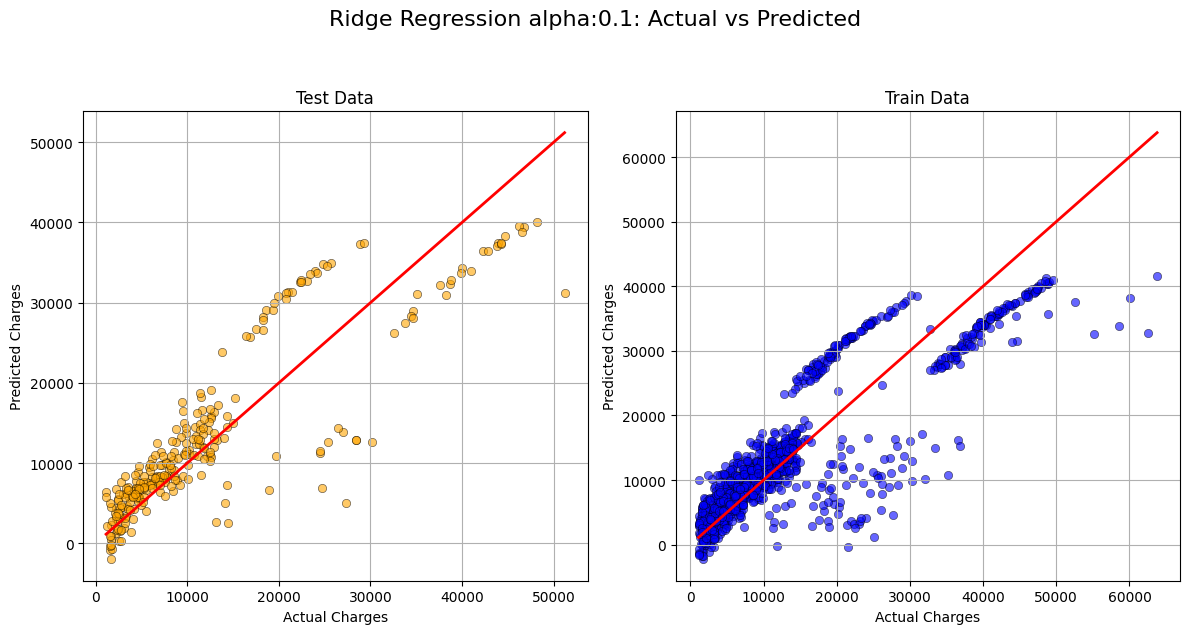

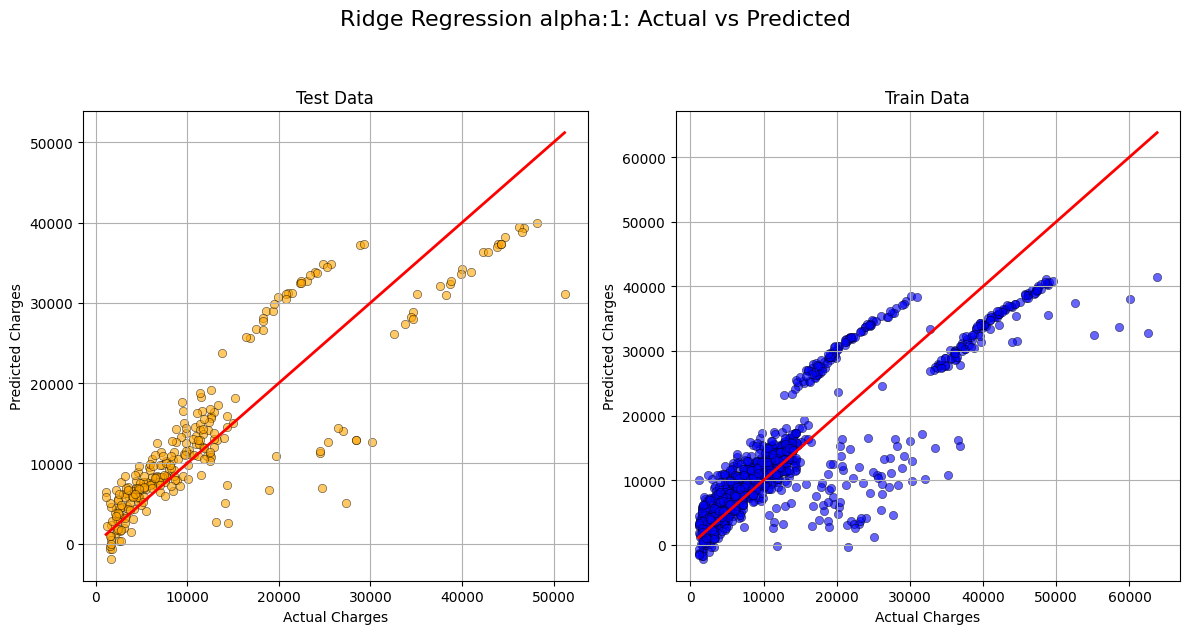

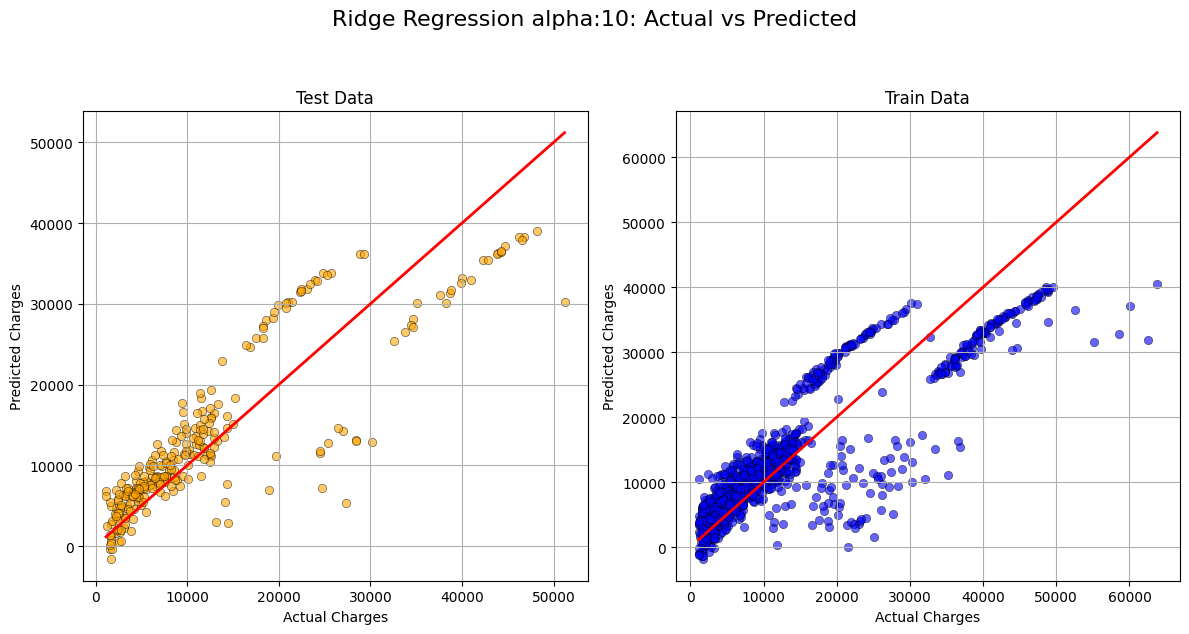

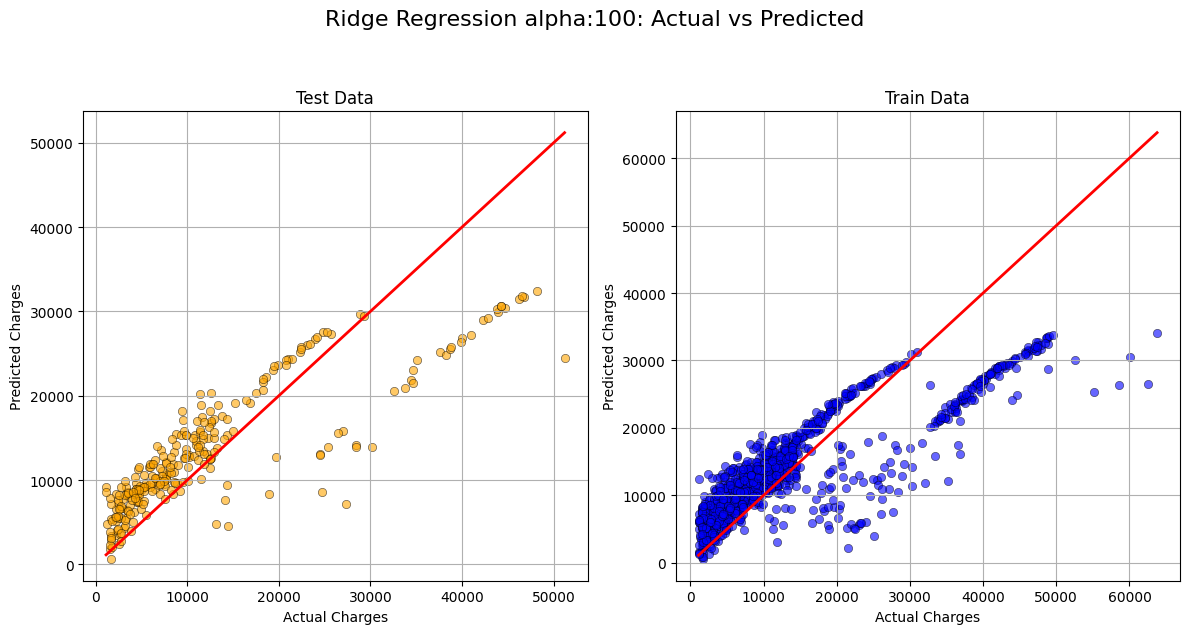

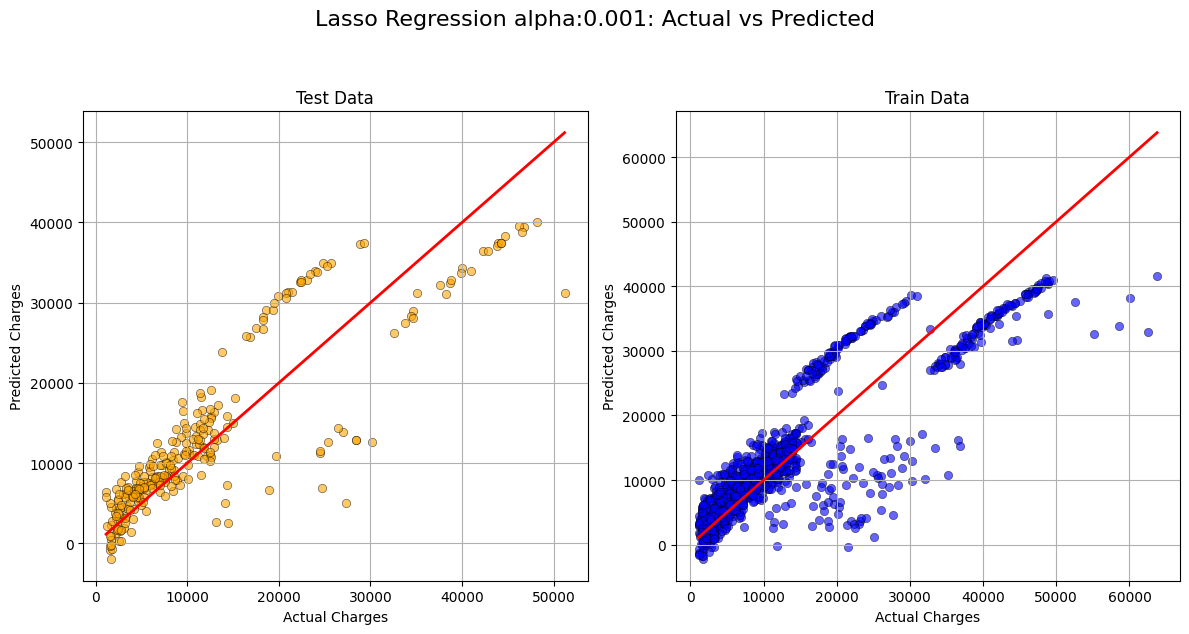

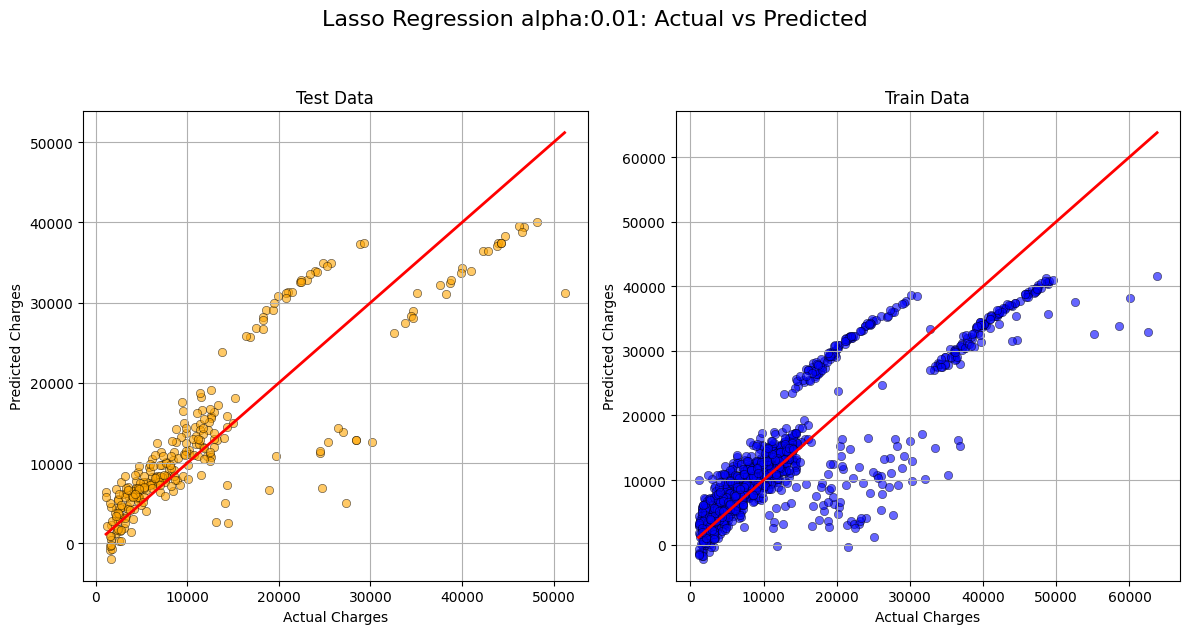

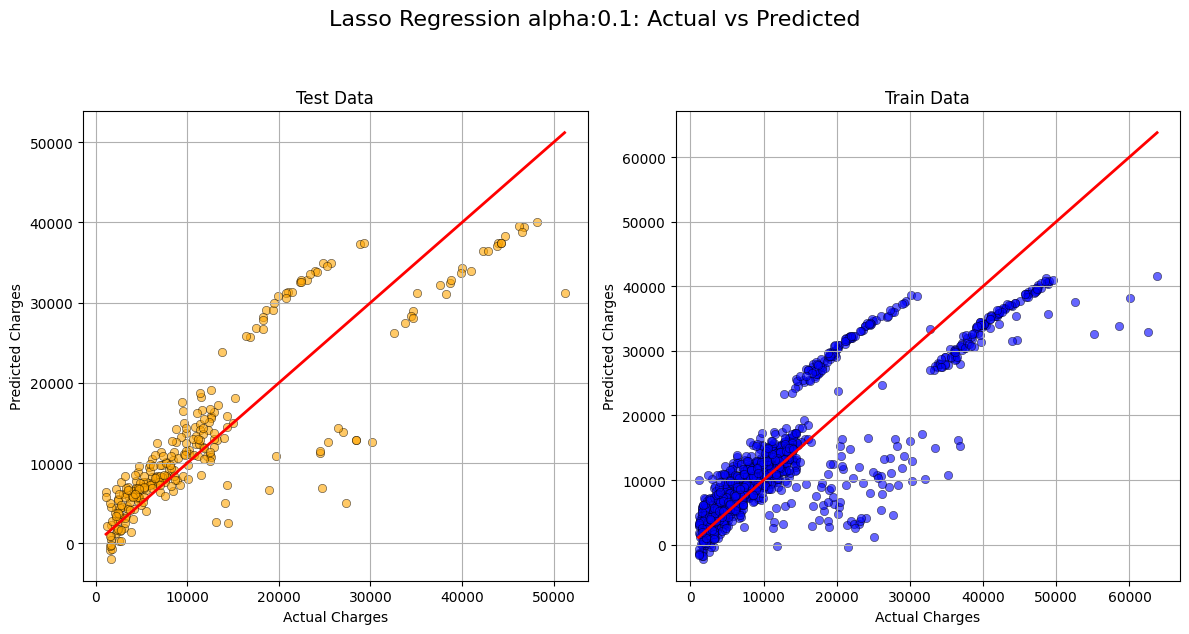

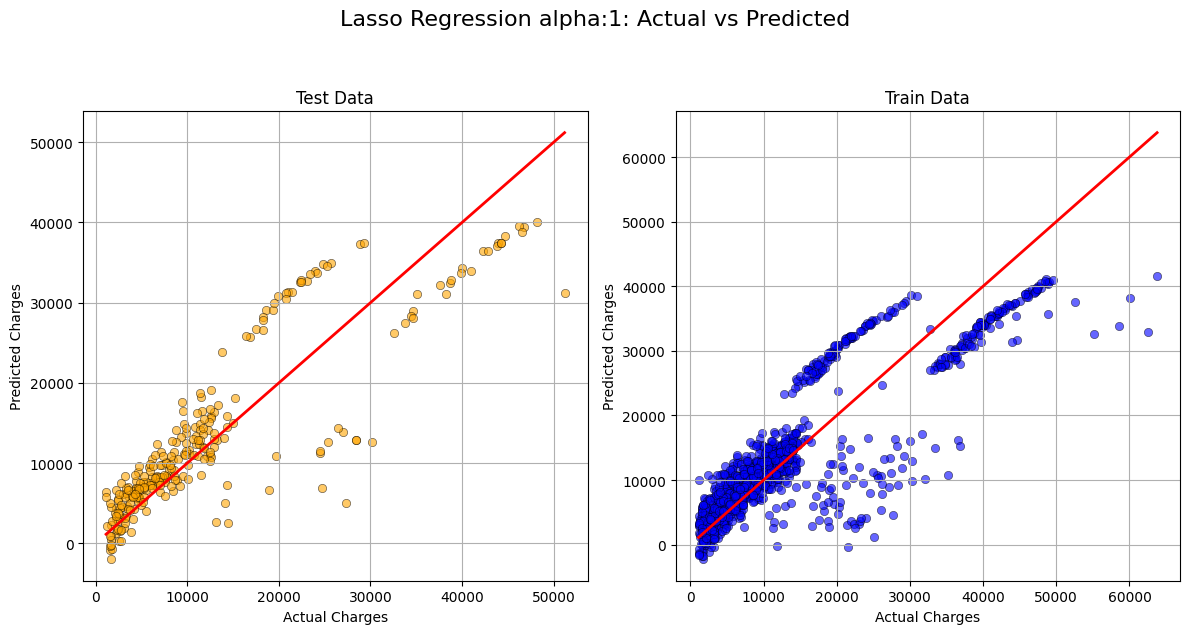

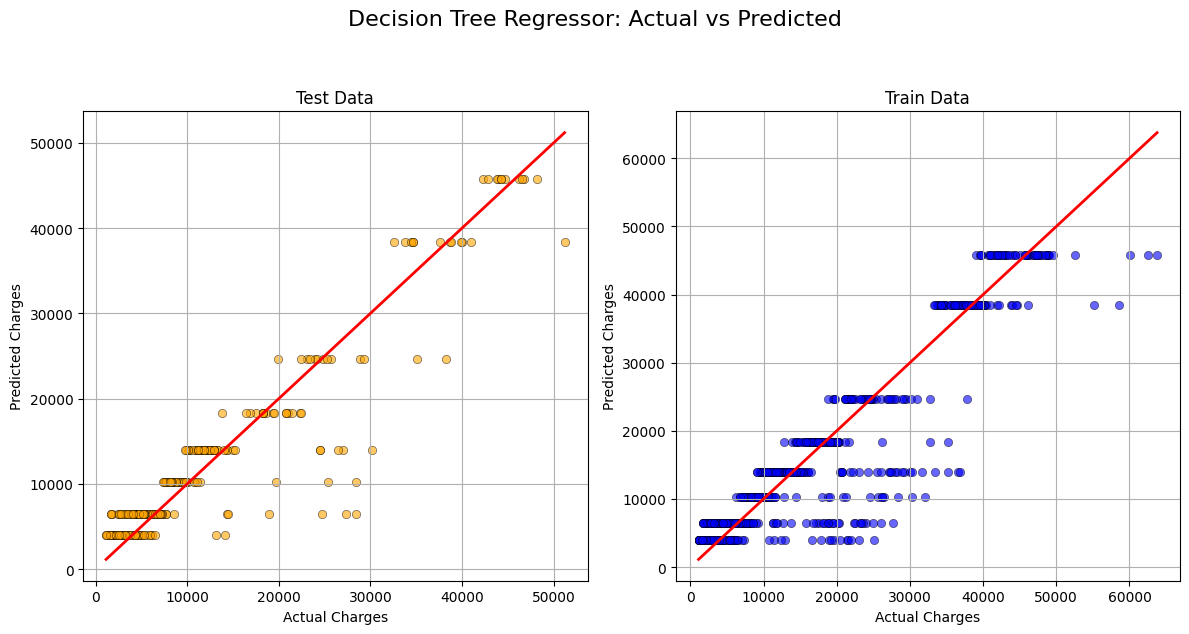

In [31]:
# 2. Actual vs Predicted Scatter Plots in Grids
colors = {
    "Train": 'blue',
    "Test": 'orange'
}
for model_name in model_results:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'{model_name}: Actual vs Predicted', fontsize=16, y=1.05)

    for ax, dataset_type in zip(axes, ['Test', 'Train']):
        y_pred = model_results[model_name][dataset_type]['y_pred']
        y_true = model_results[model_name][dataset_type]['y_true']

        sns.scatterplot(
            x=y_true, y=y_pred, 
            alpha=0.6, edgecolor='k', ax=ax,
            color=colors[dataset_type]
        )
        sns.lineplot(
            x=[y_true.min(), y_true.max()],
            y=[y_true.min(), y_true.max()],
            color='red', lw=2, ax=ax
        )

        ax.set_xlabel('Actual Charges')
        ax.set_ylabel('Predicted Charges')
        ax.set_title(f'{dataset_type} Data')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

### Step 3 — Interpret Results (short writeup)

- Identify overfitting (high train score, low test score).
- Identify underfitting (low scores on both).
- Discuss which model has the best bias-variance balance.

In [32]:
best_model = None
balance_scores = []

RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
RESET = "\033[0m"

for model_name, results in model_results.items():
    r2_train = results['Train']['R^2']
    r2_test = results['Test']['R^2']

    print(f"\nModel: {model_name}")
    print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")

    if r2_train - r2_test > 0.15 and r2_test < r2_train:
        print(f"{RED}Possible Overfitting (High Train, Low Test){RESET}")

    elif r2_train < 0.5 and r2_test < 0.5:
        print(f"{YELLOW}Possible Underfitting (Low Train and Test Scores){RESET}")

    else:
        print(f"{GREEN}Seems balanced{RESET}")

    score = min(r2_train, r2_test) - abs(r2_train - r2_test)
    balance_scores.append((model_name, score))

balance_scores.sort(key=lambda x: x[1], reverse=True)

best_model = balance_scores[0][0]

print("\nBias–variance balance scores:")
for name, score in balance_scores:
    print(f"{name}: {score:.3f}")

print(f"\nBest bias–variance balance: {GREEN}{best_model}{RESET}")



Model: Simple Linear Regression
Train R²: 0.046, Test R²: -0.002
Possible Underfitting (Low Train and Test Scores)

Model: Multiple Linear Regression
Train R²: 0.749, Test R²: 0.757
Seems balanced

Model: Polynomial Regression (single feature) Degree:2
Train R²: 0.046, Test R²: 0.001
Possible Underfitting (Low Train and Test Scores)

Model: Polynomial Regression (single feature) Degree:3
Train R²: 0.047, Test R²: 0.002
Possible Underfitting (Low Train and Test Scores)

Model: Polynomial Regression (multi-feature) Degree:2
Train R²: 0.847, Test R²: 0.845
Seems balanced

Model: Polynomial Regression (multi-feature) Degree:3
Train R²: 0.858, Test R²: 0.835
Seems balanced

Model: Ridge Regression alpha:0.1
Train R²: 0.749, Test R²: 0.757
Seems balanced

Model: Ridge Regression alpha:1
Train R²: 0.749, Test R²: 0.758
Seems balanced

Model: Ridge Regression alpha:10
Train R²: 0.747, Test R²: 0.759
Seems balanced

Model: Ridge Regression alpha:100
Train R²: 0.664, Test R²: 0.688
Seems balanc

the best model is Decision Tree Regressor but we should use Polynomial Regression (multi-feature) Degree:2 since it is almost as good as Decision Tree Regressor and has less time complexity

## Knowledge Check Questions

#### 1. Why is R² a preferred metric for regression? What are its limitations?

Preferred:
- Measures how much variance in the target is explained by the model.
- Easy to interpret (closer to 1 = better fit).
- Unitless, so can compare across datasets.

Limitations:
- Can be misleading if you add more features — R² will never decrease, even if the feature is irrelevant.
- Doesn’t indicate overfitting.
- Not always meaningful for non-linear relationships or when residuals are not normally distributed.

#### 2. What is the impact of alpha in Ridge and Lasso?

Ridge: Alpha controls L2 regularization.
- Higher alpha → more shrinkage of coefficients toward zero (but never exactly zero).

Lasso: Alpha controls L1 regularization.
- Higher alpha → more coefficients driven exactly to zero (feature selection).

Impact:
- Very high alpha → underfitting.
- Very low alpha → risk of overfitting.

#### 3. What does a high training score but low test score indicate?

Likely Overfitting:
- Model has learned noise/patterns specific to training data.
- Poor generalization to unseen data.
- Usually happens with overly complex models or insufficient regularization.

#### 4. Why is Polynomial Regression more prone to overfitting?

Increasing polynomial degree adds more flexibility, allowing the model to fit small fluctuations in training data. This flexibility means it can capture noise as if it were a real pattern. Without regularization or cross-validation, the model can fail badly on new data.

#### 5. When would you use a Decision Tree Regressor instead of Linear Regression?

When the relationship between features and target is non-linear and not well-approximated by a straight line. When you want automatic feature interaction detection without manually adding polynomial terms. When features are a mix of numerical and categorical. Useful when interpretability via if–then rules is important.